<a href="https://colab.research.google.com/github/Ga-Young-Ahn/Study/blob/main/CH3_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EA%B8%B0%EB%B3%B8_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.1 퍼셉트론: 가장 간단한 신경망**

입력(x), 출력(y), 가중치(w), 절편(b), 활성화 함수(f)

가중치와 절편은 데이터에서 학습되고, 활성화함수는 신경망과 타깃 출력을 기반으로 설계자의 직관에 따라 결정됨

파이토치로 구현한 퍼셉트론

In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  """ 퍼셉트론은 하나의 선형 층입니다 """
  def __init__(self, input_dim):
    """
    매개변수:
        input_dim (int) : 입력 특성의 크기
    """
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1)

  def forward(self, x_in):
    """
    퍼셉트론의 정방향 계산

    매개변수:
        x_in (torch.Tensor) : 입력 데이터 텐서
            x_in.shape는 (batch, num_features)입니다.
    반환값:
        결과 텐서. tensor.shape는 (batch,)입니다.
    """
    return torch.sigmoid(self, fc1(x_in)).squeeze()

**3.2 활성화 함수**

3.2.1 시그모이드

임의의 실수값을 받아 0과 1 사이의 범위로 압축함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


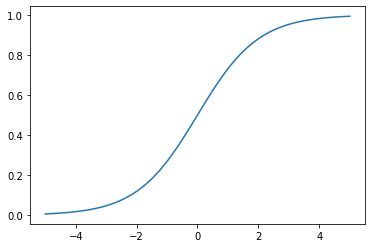

In [ ]:
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

3.2.2 하이퍼볼릭 탄젠트

시그모이드 함수의 선형 변환임

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


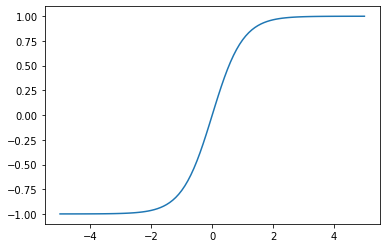

In [ ]:
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

3.2.3 렐루

음숫값을 0으로 자름

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


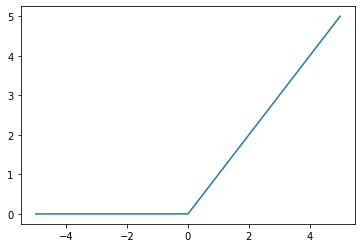

In [ ]:
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = torch.relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

3.2.4 소프트맥스

소프트맥스 출력의 합은 1이기에 분류 작업의 출력을 해석하는 데 유용함. 그래서 확률 기반의 목적 함수인 범주형 크로스 엔트로피와 함께 사용되는 것이 보통.

In [ ]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.0642, -0.0426, -0.9126]])
tensor([[0.4082, 0.4171, 0.1747]])
tensor([1.])


**3.3 손실 함수**

정답과 예측을 입력으로 받아 실숫값 점수를 만듦. 점수가 높을수록 모델의 예측 성능이 나빠짐

3.3.1 평균 제곱 오차 손실 MSE

: 신경망의 출력과 타깃이 연속값인 회귀 문제에서 널리 사용됨

In [ ]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(3.6795, grad_fn=<MseLossBackward0>)


3.3.2 범주형 크로스 엔트로피 손실

: 출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 다중 분류 문제에 사용됨

In [ ]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(0.8038, grad_fn=<NllLossBackward0>)


3.3.3 이진 크로스 엔트로피 손실

아래 코드에서는 신경망의 출력을 가장한 랜덤 벡터에 시그모이드 활성화 함수를 적용해 이진 확률 벡터인 probabilities를 만든 것

In [ ]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.3104],
        [0.6843],
        [0.3859],
        [0.5724]], grad_fn=<SigmoidBackward0>)
tensor(1.0312, grad_fn=<BinaryCrossEntropyBackward0>)


**3.4 지도 학습 훈련 알아보기**

1) 예제 데이터 만들기 : get_toy_data()  
2) 모델 선택 : 퍼셉트론  
3) 확률을 클래스로 변환하기 : 결정 경계 적용  
4) 손실 함수 선택 : 이진 크로스 엔트로피  
5) 옵티마이저 선택 : 오차 신호를 사용해 모델의 가중치를 업데이트함  
6) 모두 합치기 : 그레이디언트 기반의 지도 학습

In [ ]:
# 퍼셉트론과 이진 분류를 위한 지도 학습 훈련 반복

# 각 에포크는 전체 훈련 데이터를 사용함
for epoch_i in range(n_epochs):
  # 내부 반복은 데이터셋에 있는 배치에 대해 수행됨
  for batch_i in range(n_batches):
    x_data, y_target = get_toy_data(batch_size)  # 데이터 가져오기
    perceptron.zero_grad()  # 그레이디언트 초기화
    y_pred = perceptron(x_data, apply_sigmoid=True)  # 모델의 정방향 계산 수행하기
    loss = bce_loss(y_pred, y_target)  # 최적하려는 손실 계산하기
    loss.backward()  # 손실 신호를 거꾸로 전파하기
    optimizer.step()  # 옵티마이저로 업데이트하기

**3.6 예제 : 레스토랑 리뷰 감성 분류하기**

< yelp_dataset_preprocessing_LITE >  
reviews_with_split.csv 파일이 최소한의 데이터 정제 작업 완료된 건가??

In [ ]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tqdm

In [ ]:
### 데이터 벡터화 클래스

class ReviewDataset(Dataset):
  def __init__(self, review_df, vectorizer):
    self.review_df = review_df   #데이터셋
    self.vectorizer = vectorizer  #ReviewVectorizer 객체

    self.train_df = self.review_df[self.review_df.split=='train']
    self.train_size = len(self.train_df)

    self.val_df = self.review_df[self.review_df.split=='val']
    self.validation_size = len(self.val_df)

    self.test_df = self.review_df[self.review_df.split=='test']
    self.test_size = len(self.test_df)

    self._lookup_dict = {'train':(self.train_df, self.train_size),
                         'val':(self.val_df, self.validation_size),
                         'test':(self.test_df, self.test_size)}
    self.set_split(train)


  @classmethod
  def load_dataset_and_make_vectorizer(cls, review_csv):
    # 데이터셋을 로드하고 새로운 ReviewVectorizer 객체를 만듦
    review_df = pd.read_csv(review_csv)  #<--매개변수: 데이터셋의 위치
    return cls(review_df, ReviewVectorizer.from_dataframe(review_df))  #<--반환값: ReviewDataset의 인스턴스
  

  def get_vectorizer(self):
    return self._vectorizer #ReviewVectorizer 객체를 반환함


  def set_split(self, split='train'):
    self._target_split = split
    self._target_df, self._target_size = self._lookup_dict[split]


  def __len__(self):
    return self._target_size
  

  def __getitem__(self, index): # 파이토치 데이터셋의 주요 진입 메서드
    # 매개변수: index (int) - 데이터 포인트의 인덱스
    # 반환값: 데이터 포인트의 특성(x_data)과 레이블(y_target)로 이루어진 딕셔너리
    row = self._target_df.iloc[index]
    
    review_vector = self._vectorizer.vectorize(row.review)
    rating_index = self._vectorizer.rating_vocab.lookup_token(row.rating)

    return {'x_data':review_vector, 'y_target':rating_index}

  
  def get_num_batches(self, batch_size): # 배치 크기가 주어지면 데이터셋으로 만들 수 있는 배치 개수 반환
    return len(self)//batch_size

3.6.3 Vocabulary, Vectorizer, DataLoader 클래스

*1) Vocabulary*  
머신러닝 파이프라인에 필요한 토큰과 정수 매핑을 관리함  
- add_token() : 새로운 토큰을 추가  
- lookup_token() : 토큰에 해당하는 인덱스를 추출
- lookup_index() : 특정 인덱스에 해당하는 토큰을 추출

In [ ]:
class Vocabulary(object):
  """ 매핑을 위해 텍스트를 처리하고 어휘 사전을 만드는 클래스 """

  def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
    """ 
    매개변수 : token_to_idx (dict): 기존 토큰-인덱스 매핑 딕셔너리
               add_unk (bool): UNK 토큰을 추가할지 지정하는 플래그
               unk_token (str): Vocabulary에 추가할 UNK 토큰
    """
    if token_to_idx is None:
      token_to_idx = {}
    self._token_to_idx = token_to_idx

    self._idx_to_token = {idx: token
                          for token, idx in self._token_to_idx.items()}
    
    self._add_unk = _add_unk
    self._unk_token = unk_token

    self.unk_index = -1
    if add_unk:
      self.unk_index = self.add_token(unk_token)

  @classmethod
  def to_serializable(self, contents):
    """ 직렬화할 수 있는 딕셔너리를 반환합니다 """
    return cls(**contents)

  
  def add_token(self, token):
    """ 토큰을 기반으로 매핑 딕셔너리를 업데이트합니다
    매개변수 : token (str): Vocabulary에 추가할 토큰
    반환값 : index (int): 토큰에 상응하는 점수
    """
    if token in self._token_to_idx:
      index = self._token_to_idx[token]
    else:
      index = len(self._token_to_idx)
      self._token_to_idx[token] = index
      self._idx_to_token[index] = token
    return index

  
  def lookup_token(self, token):
    """ 토큰에 대응하는 인덱스를 추출합니다. 토큰이 없으면 UNK 인덱스를 반환합니다
    매개변수 : token (str): 찾을 토큰
    반환값 : index (int): 토큰에 해당하는 인덱스
    노트 : UNK 토큰을 사용하려면 'unk_index'가 0보다 커야 함
    """
    if self.add_unk:
      return self._token_to_idx.get(token, self.unk_index)
    else:
      return self._token_to_idx[token]

  
  def lookup_index(self, index):
    if index not in self._idx_to_token:
      raise KeyError('Vocabulary에 인덱스(%d)가 없습니다' % index)
    return self._idx_to_token[index]

  
  def __str__(self):
    return "<Vocabulary(size=%d)>" % len(self)

  def __len__(self):
    return len(self._token_to_idx)

*2) Vectorizer*

입력 데이터 포인트의 토큰을 순회하하면서 각 토큰을 정수로 바꿔서 벡터 결과를 내야 함 

-> Vectorizer 클래스는 리뷰의 단어를 정수로 매핑한 Vocabulary를 캡슐화함

텍스트를 수치 벡터로 변환하는 Vectorizer 클래스

In [ ]:
class ReviewVectorizer(object):
  """ 어휘 사전을 생성하고 관리합니다 """
  def __init__(self, review_vocab, rating_vocab):
    self.review_vocab = review_vocab  # 단어를 정수에 매핑하는 Vocabulary
    self.rating_vocab = rating_vocab  # 클래스 레이블을 정수에 매핑하는 Vocabulary

  
  def vectorize(self, review): 
    """ 리뷰에 대한 원-핫 벡터를 만듭니다 """
    one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)

    for token in review.split(" "):
      if token not in string.punctuation:
        one_hot[self.review_vocab.lookup_token(token)] = 1
    
    return one_hot

  
  @classmethod
  def from_dataframe(cls, review_df, cutoff=25): 
    """ 데이터셋 데이터프레임에서 Vectorizer 객체를 만듭니다 """
    review_vocab = Vocabulary(add_unk=True)
    rating_vocab = Vocabulary(add_unk=False)

    # 점수를 추가합니다
    for rating in sorted(set(review_df.rating)):
      rating_vocab.add_token(rating)

    # count > cutoff인 단어를 추가합니다
    word_counts = Counter()
    for review in review_df.review:
      for word in review.split(" "):
        if word not in string.punctuation:
          word_counts[word] += 1

    for word, count in word_counts.items():
      if count > cutoff:
        review_vocab.add_token(word)

    return cls(review_vocab, rating_vocab)

  
  @classmethod
  def from_serializable(cls, contents): 
    """ 직렬화된 딕셔너리에서 ReviewVectorizer 객체를 만듭니다 """
    review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
    rating_vocab = Vocabulary.from_serializable(contents['rating_vocab'])

    return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

  
  def to_serializable(self): 
    """ 캐싱을 위해 직렬화된 딕셔너리를 만듭니다 """
    return {'review_vocab':self.review_vocab.to_serializable(),
            'rating_vocab':self.rating_vocab.to_serializable()}

*3) DataLoader*

텍스트를 벡터로 변환한 데이터 포인트 모으기

데이터셋에서 미니배치 생성하기

In [ ]:
from torch.utils.data import DataLoader

def generate_batches(dataset, batch_size, shuffle=True, drop_last=True, device='cpu'):
  """ 파이토치 DataLoader를 감싸는 제너레이터 함수. 각 텐서를 지정된 장치로 이동함 """
  dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

  for data_dict in dataloader:
    out_data_dict = {}
    for name, tensor in data_dict.items():
      out_data_dict[name] = data_dict[name].to(device)
    yield out_data_dict

3.6.4 퍼셉트론 분류기

In [ ]:
import torch.nn as nn

class ReviewClassifier(nn.Module):
  """ 간단한 퍼셉트론 기반 분류기 """
  def __init__(self, num_features): #<-- 입력 특성 벡터의 크기
    super(ReviewClassifier, self).__init__()
    self.fc1 = nn.Linear(in_features = num_features,
                         out_feautres = 1)
    
  
  def forward(self, x_in, apply_sigmoid=False):
    """ 분류기의 정방향 계산 """
    y_out = self.fc1(x_in).squeeze()
    if apply_sigmoid:
      y_out = torch.sigmoid(y_out)
    return y_out

3.6.5 모델 훈련

args 객체 : 모든 결정 요소를 관리함

In [ ]:
from argparse import Namespace

args = NameSpace(
    frequency_cutoff = 25,
    model_state_file = 'model.pth',
    review_csv = '/content/reviews_with_splits_lite.csv',
    save_dir = '/content/',
    vectorizer_file = 'vectorizer.json',
    # 모델 하이퍼파라미터 없음
    # 훈련 하이퍼파라미터
    batch_size = 128,
    early_stopping_criteria = 5,
    learning_rate = 0.001,
    num_epochs = 100,
    seed = 1337
)

In [ ]:
### 데이터셋, 모델, 손실, 옵티마이저, 훈련 상태 딕셔너리 만들기
import torch.optim as optim

def make_train_state(args):
  return {'epoch_index':0,
          'train_loss':[],
          'train_acc':[],
          'val_loss':[],
          'val_acc':[],
          'test_loss':-1,
          'test_acc':-1}

train_state = make_train_state(args)

if not torch.cuda.is_available():
  args.cuda = False
args.device = torch.device('cuda'if args.cuda else 'cpu')

# 데이터셋과 Vectorizer
dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer = dataset.get_vectorizer()

# 모델
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device)

# 손실 함수와 옵티마이저
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)



NameError: ignored

In [ ]:
### 훈련 반복
for epoch_index in range(args.num_epochs):
  trian_state['epoch_index'] = epoch_index

  dataset.set_split('train')
  batch_generator = generate_batches(dataset, 
                                     batch_size=args.batch_size,
                                     device = args.device)
  running_loss = 0.0
  running_acc = 0.0
  classifier.train()

  for batch_index, batch_dict in enumerate(batch_generator):
    optimizer.zero_grad()  #1단계. 그레이디언트를 0으로 초기화
    y_pred = classifier(x_in=batch_dict['x_data'].float())  #2단계. 출력을 계산함
    loss = loss_func(y_pred, batch_dict['y_target'.float()])  #3단계. 손실을 계산함
    loss_batch = loss.item()
    running_loss += (loss_batch - running_loss) / (batch_index + 1)
    loss.backward()  #4단계. 손실을 사용해 그레이디언트를 계산함
    optimizer.step()  #5단계. 옵티마이저로 가중치를 업데이트함

    acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])  #정확도를 계산함
    running_acc += (acc_batch - running_acc) / (batch_index + 1)
  
  train_state['train_loss'].append(running_loss)
  train_state['train_acc'].append(running_acc)

  # 검증 세트에 대한 순회
  # 검증 세트와 배치 제너레이터 준비, 손실과 정확도를 0으로 설정
  dataset.set_split('val')
  batch_generator = generate_batches(dataset, 
                                      batch_size=args.batch_size, 
                                      device=args.device)
  running_loss = 0.
  running_acc = 0.
  classifier.eval()

  for batch_index, batch_dict in enumerate(batch_generator):

      # 단계 1. 출력을 계산합니다
      y_pred = classifier(x_in=batch_dict['x_data'].float())

      # 단계 2. 손실을 계산합니다
      loss = loss_func(y_pred, batch_dict['y_target'].float())
      loss_batch = loss.item()
      running_loss += (loss_batch - running_loss) / (batch_index + 1)

      # 단계 3. 정확도를 계산합니다
      acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
      running_acc += (acc_batch - running_acc) / (batch_index + 1)
      
  train_state['val_loss'].append(running_loss)
  train_state['val_acc'].append(running_acc)

3.6.6 평가, 추론, 분석